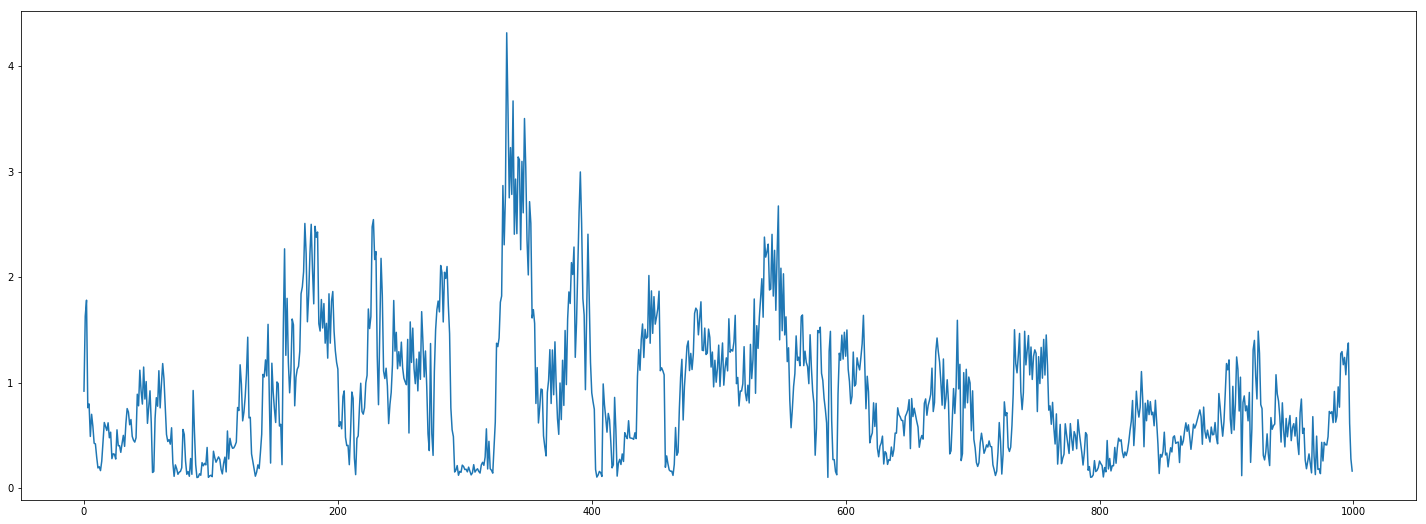

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('train.csv', usecols=[1], engine='python')
dataset = dataset[:1000]
plt.figure(figsize=(25,9))
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
dataset.head()

,count
0,0.919600
1,1.630779
2,1.781370
3,0.762524
4,0.798543


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#preprocessing the dataset

In [5]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [6]:
print(dataset.shape)

print(dataset[0])

(1000, 1)
[ 0.19427697]


In [8]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)



In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [10]:


print(trainX)
#print(trainY)
print(trainX.shape)

print(trainY.shape)

[[[  1.94276971e-01]]

 [[  3.63048147e-01]]

 [[  3.98785161e-01]]

 [[  1.57000820e-01]]

 [[  1.65548503e-01]]

 [[  9.24360289e-02]]

 [[  1.42223323e-01]]

 [[  1.15384986e-01]]

 [[  7.71309242e-02]]

 [[  7.57819353e-02]]

 [[  4.59678618e-02]]

 [[  2.16621559e-02]]

 [[  2.44229437e-02]]

 [[  1.56203055e-02]]

 [[  3.71540315e-02]]

 [[  8.13962763e-02]]

 [[  1.23781600e-01]]

 [[  1.14372548e-01]]

 [[  1.05800403e-01]]

 [[  1.23136863e-01]]

 [[  8.94352497e-02]]

 [[  1.02044765e-01]]

 [[  4.25535765e-02]]

 [[  5.34596175e-02]]

 [[  5.24313372e-02]]

 [[  4.16310984e-02]]

 [[  1.07317594e-01]]

 [[  7.13154528e-02]]

 [[  7.18616967e-02]]

 [[  5.67064353e-02]]

 [[  7.67060228e-02]]

 [[  9.48380010e-02]]

 [[  7.01368817e-02]]

 [[  1.21049686e-01]]

 [[  1.55118055e-01]]

 [[  1.47231478e-01]]

 [[  1.18735071e-01]]

 [[  1.30486485e-01]]

 [[  9.26932961e-02]]

 [[  8.39379466e-02]]

 [[  7.97358455e-02]]

 [[  8.94329012e-02]]

 [[  1.87386841e-01]]

 [[  1.6133

In [11]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(128, return_sequences = True))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 128)            66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1)              129       
Total params: 593,025
Trainable params: 593,025
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(trainX, trainY, nb_epoch=100, batch_size=32, verbose=2)

/Users/runchenmac/anaconda3/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking target: expected dense_1 to have 3 dimensions, but got array with shape (798, 1)

In [46]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [47]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Train Score: 0.08 RMSE
Test Score: 0.41 RMSE


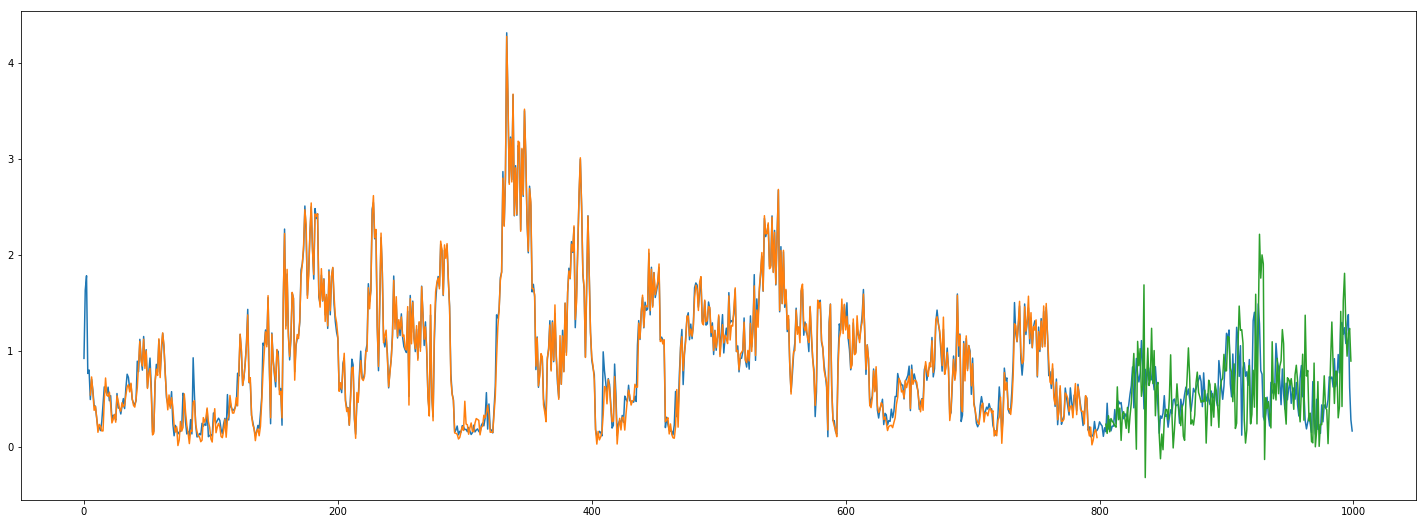

In [48]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(25,9))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()